<a href="https://colab.research.google.com/github/SLTH-Project/ThSL-Model/blob/main/Dataset/Augmentation_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from zipfile import ZipFile
file_name = '/content/Dataset.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


#Import

In [ ]:
from numpy import expand_dims
import numpy as np

import keras
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


import tensorflow
import tensorflow as tf

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread

from PIL import Image 
from PIL import ImageFilter 

from scipy import ndimage
from skimage.transform import resize

import os
from os import listdir

import cv2
import time


#Define

In [ ]:
size=224
size_pad=3

#Resize and pad

In [ ]:
#Read
root_dir = '/content/'
readDataset_dir = os.path.join(root_dir, 'Dataset')
readSubFloderName=[
  os.path.join(readDataset_dir,'A'),
  os.path.join(readDataset_dir, 'B B'),
  os.path.join(readDataset_dir, 'C')
]

In [ ]:
#Save
saveDataset_dir = os.path.join(root_dir, 'Dataset_resize2')
saveSubFloderName=[
  os.path.join(saveDataset_dir,'A'),
  os.path.join(saveDataset_dir, 'B B'),
  os.path.join(saveDataset_dir, 'C')
]

In [ ]:
def createFloder(saveDataset_dir ,saveSubFloderName):
  if not os.path.exists(saveDataset_dir ):
    os.makedirs(saveDataset_dir )
    print('create saveDataset_dir :',saveDataset_dir ) 

  for subdir_new in saveSubFloderName: 
    os.makedirs(subdir_new)
    print('create saveSubFloderName :',subdir_new)

createFloder(saveDataset_dir ,saveSubFloderName)

create saveDataset_dir : /content/Dataset_resize2
create saveSubFloderName : /content/Dataset_resize2/A
create saveSubFloderName : /content/Dataset_resize2/B B
create saveSubFloderName : /content/Dataset_resize2/C


In [ ]:
def resize (size,readSubFloderName,saveSubFloderName): 
  countPath=0
  i=0
  # read and save
  for subdir in readSubFloderName: 
    countPath = countPath + 1
    print('\nClass: ',countPath,'  subdir : ' ,subdir)
    for subdir, dirs, files in os.walk(subdir): 
      for file in files:
        frame = os.path.join(subdir, file)
        img = Image.open(frame)
        while(i>=0):
          right = size_pad
          left = size_pad
          top = size_pad
          bottom = size_pad
          width, height = img.size
          new_width = width + right + left
          new_height = height + top + bottom
          result = Image.new(img.mode, (new_width, new_height), (255, 255, 255))
          result.paste(img, (left, top))
          saveResize = os.path.join(saveSubFloderName[i], 'resize_'+file+'.png') 
          result.resize((size,size)).save(saveResize)
          break
    i=i+1
    print('-----------------------------------end root---------------------------------------')

resize(size,readSubFloderName,saveSubFloderName)


Class:  1   subdir :  /content/Dataset/A
-----------------------------------end root---------------------------------------

Class:  2   subdir :  /content/Dataset/B B
-----------------------------------end root---------------------------------------

Class:  3   subdir :  /content/Dataset/C
-----------------------------------end root---------------------------------------


#Augmentation

In [ ]:
#Read
root_dir = '/content/'
readDataset_dir = os.path.join(root_dir, 'Dataset_resize2')
readSubFloderName=[
  os.path.join(readDataset_dir,'A'),
  os.path.join(readDataset_dir, 'B B'),
  os.path.join(readDataset_dir, 'C')
]

In [ ]:
#Save
saveDataset_dir = os.path.join(root_dir, 'Dataset_aug5')
saveSubFloderName=[
  os.path.join(saveDataset_dir,'A'),
  os.path.join(saveDataset_dir, 'B B'),
  os.path.join(saveDataset_dir, 'C')
]

In [ ]:
def createFloder(saveDataset_dir ,saveSubFloderName):
  if not os.path.exists(saveDataset_dir ):
    os.makedirs(saveDataset_dir )
    print('create saveDataset_dir :',saveDataset_dir ) 

  for subdir_new in saveSubFloderName: 
    os.makedirs(subdir_new)
    print('create saveSubFloderName :',subdir_new)

createFloder(saveDataset_dir ,saveSubFloderName)

create saveDataset_dir : /content/Dataset_aug5
create saveSubFloderName : /content/Dataset_aug5/A
create saveSubFloderName : /content/Dataset_aug5/B B
create saveSubFloderName : /content/Dataset_aug5/C


In [ ]:
def augmentation (size,readSubFloderName,saveSubFloderName): 
  countPath=0
  # read and save
  i=0
  for subdir in readSubFloderName: 
    countPath = countPath + 1
    print('\nClass: ',countPath,'  subdir : ' ,subdir)
    for subdir, dirs, files in os.walk(subdir): 
      for file in files:
        load_image = image.load_img(os.path.join(subdir, file), color_mode ='rgb',target_size = (size,size))
        while(i>=0):
          PIL_image = Image.fromarray(np.uint8(load_image)).convert('RGB')
          img = PIL_image.resize((size,size))
          img = image.img_to_array(img)
          img = np.expand_dims(img, axis = 0)
          aug = ImageDataGenerator(
              rotation_range=10,
              brightness_range=[0.1,1.2],
              zoom_range=[1.0,1.2],
              horizontal_flip=True,
              )
          j = 0
          for batch in aug.flow(
                    img,
                    save_to_dir=saveSubFloderName[i],
                    save_prefix='aug_',      
                    save_format='png'):    
            j += 1    
            if j > 5:        
              break 
          break 
    i=i+1
    print('-----------------------------------end root---------------------------------------')

augmentation(size,readSubFloderName,saveSubFloderName)


Class:  1   subdir :  /content/Dataset_resize2/A
-----------------------------------end root---------------------------------------

Class:  2   subdir :  /content/Dataset_resize2/B B
-----------------------------------end root---------------------------------------

Class:  3   subdir :  /content/Dataset_resize2/C
-----------------------------------end root---------------------------------------


In [ ]:
import shutil
shutil.make_archive('/content/Dataset_aug5', 'zip', '/content/Dataset_aug5')

'/content/Dataset_aug5.zip'

#test aug

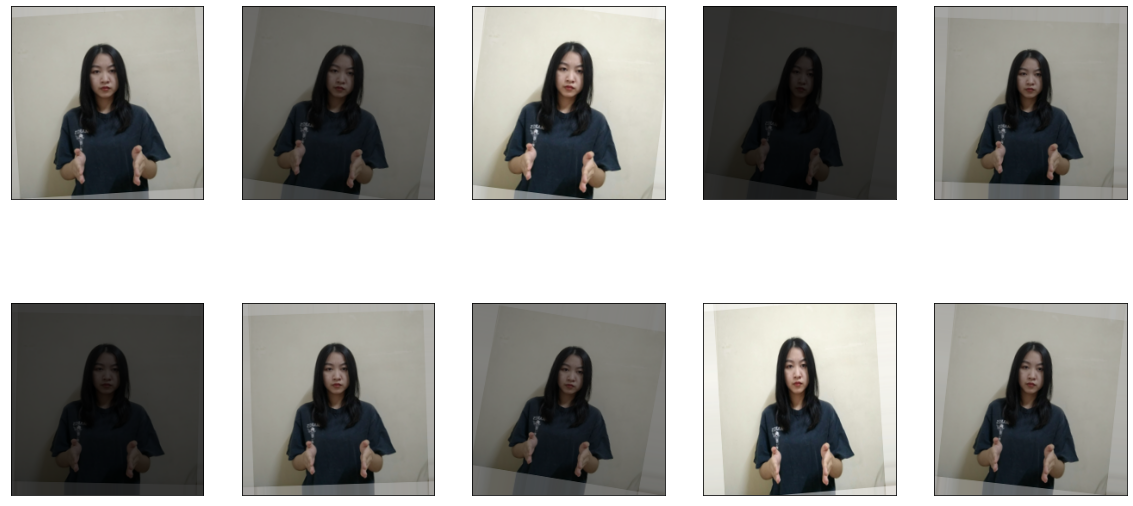

In [ ]:
load_image = image.load_img(os.path.join('/content/Dataset_resize2/A/resize_LINE_ALBUM_13_220215_0.jpg.png'), color_mode ='rgb',target_size = (224,224))
load_image = image.img_to_array(load_image)
load_image = np.expand_dims(load_image, axis = 0)
#load_image = preprocess_input(load_image)
aug = ImageDataGenerator(
        #featurewise_center=True,
        #samplewise_center=True,
        #featurewise_std_normalization=True,
        #samplewise_std_normalization=True,
        rotation_range=10,
        #width_shift_range=0.0,
        #height_shift_range=0.0,
        brightness_range=[0.1,1.2],
        #shear_range=0.5,
        zoom_range=[1.0,1.2],
        #horizontal_flip=True,
        )
#save
#for x, val in zip(aug.flow(load_image,                    
#   save_to_dir=save_dir,    
#   save_prefix='aug_',      
#   save_format='jpg'),
#   range(9)) : 
#   pass    # here we define a range because we want 10 augmented images otherwise it will keep looping forever I think

data_generator = aug.flow(load_image,batch_size=32)
# Display some augmented samples
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    for x in data_generator:
        plt.imshow(x[0]/255.)
        plt.xticks([])
        plt.yticks([])
        
        break
#plt.tight_layout()
plt.show()